In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/bipulshahi/Dataset/refs/heads/main/diabetes_data.csv')
df.head()

,Age,BMI,BloodPressure,GlucoseLevel,InsulinLevel,PhysicalActivityLevel,FamilyHistory,Smoking,DiabetesRisk
0,58,27.0,73.2,84.9,91.2,2,0,0,0
1,71,24.9,87.1,95.8,72.2,5,0,0,0
2,48,33.4,77.9,58.5,74.0,4,0,0,0
3,34,26.5,78.8,146.2,56.5,4,0,0,0
4,62,31.7,79.7,102.1,79.7,5,1,0,1


**Support vector machine**

In [ ]:
X = df.drop(columns = 'DiabetesRisk')
y = df['DiabetesRisk']

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,train_size=0.75)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(xtrain)
xtrainScaled = scaler.transform(xtrain)
xtestScaled = scaler.transform(xtest)

In [ ]:
from sklearn.svm import SVC
model_svc = SVC(degree=2)
model_svc.fit(xtrainScaled,ytrain)

SVC(degree=2)

In [ ]:
print(model_svc.score(xtrainScaled,ytrain))
print(model_svc.score(xtestScaled,ytest))

0.8973333333333333
0.848


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytrain , model_svc.predict(xtrainScaled)))

[[412  32]
 [ 45 261]]


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest , model_svc.predict(xtestScaled)))

[[132  13]
 [ 25  80]]


**Kernel**

In [ ]:
model_svc_poly = SVC(kernel='poly',degree=6)
model_svc_poly.fit(xtrainScaled,ytrain)

print(model_svc_poly.score(xtrainScaled,ytrain))
print(model_svc_poly.score(xtestScaled,ytest))

0.984
0.876


In [ ]:
train_accuracy = []
test_accuracy = []
for i in range(1, 12):
  model_svc_poly = SVC(kernel='poly',degree=i)
  model_svc_poly.fit(xtrainScaled,ytrain)

  train_score = model_svc_poly.score(xtrainScaled,ytrain)
  test_score = model_svc_poly.score(xtestScaled,ytest)

  train_accuracy.append(train_score)
  test_accuracy.append(test_score)

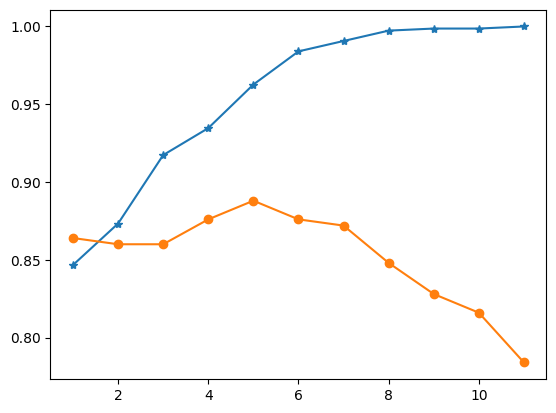

In [ ]:
plt.plot(range(1,12) , train_accuracy , marker = '*')
plt.plot(range(1,12) , test_accuracy , marker = 'o')

plt.show()

In [ ]:
model_svc_poly = SVC(kernel='poly',degree=2)
model_svc_poly.fit(xtrainScaled,ytrain)

print(model_svc_poly.score(xtrainScaled,ytrain))
print(model_svc_poly.score(xtestScaled,ytest))

0.8733333333333333
0.86


In [ ]:
print(model_svc.predict([xtest.iloc[5]]))

[1]


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(ytrain , model_svc.predict(xtrainScaled)))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       444
           1       0.89      0.85      0.87       306

    accuracy                           0.90       750
   macro avg       0.90      0.89      0.89       750
weighted avg       0.90      0.90      0.90       750



In [ ]:
print(classification_report(ytest , model_svc.predict(xtestScaled)))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       145
           1       0.86      0.76      0.81       105

    accuracy                           0.85       250
   macro avg       0.85      0.84      0.84       250
weighted avg       0.85      0.85      0.85       250

